LGMVIP-DataScience Internship - January 2022

ADVANCED LEVEL TASK-2 Next Word Prediction

Author - Shreya Balaraman

Importing Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import heapq
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM
import pickle
from tensorflow.keras.optimizers import RMSprop


Loading the Dataset

In [11]:
path = '1661-0.txt'
text = open(path).read().lower()
len(text)

581888

Split the dataset 

In [64]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [13]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

Feature Engineering

In [14]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [15]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [65]:
print(X[0][0])

[False False False ... False False False]


Building the Model

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

Training the Model

In [19]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/2
811/811 [==============================] - 267s 326ms/step - loss: 6.0044 - accuracy: 0.1079 - val_loss: 7.0660 - val_accuracy: 0.1025
Epoch 2/2
811/811 [==============================] - 266s 328ms/step - loss: 5.7784 - accuracy: 0.1479 - val_loss: 7.8786 - val_accuracy: 0.1007


In [63]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

Evaluating the Model

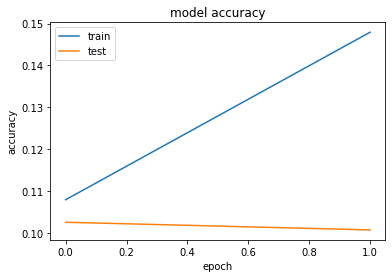

In [24]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Testing the Model and making prediction

In [42]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x


In [62]:
prepare_input("The Adventures of Sherlock Holmes".lower())

the
adventures
of
sherlock
holmes


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [39]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [40]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

Predict the next word

In [58]:
q='The Adventures of Sherlock Holmes'

In [61]:
print("next possible words: ", predict_completions(seq, 5))

the
adventures
of
sherlock
holmes
next possible words:  ['holmes', 'was', 'of', 'and', 'were']
